# Computer Assignment 5 Report
<h3>
Artificial Intelligence Course - University of Tehran - Fall 1400<br>
Nueral Networks<br>
Name: Kianoush Arshi<br>
Student ID: 810198438
</h3>
<h4>
In this assignment, we'll be implementing a feed forward neural network and utilize the network as a classifier for images in <a href="https://www.kaggle.com/c/cifar-10/data">CIFAR 10</a> dataset.<br>

    


## Table of Contents
* [Data Pre-Processing and Visualization](#Data-Pre-Processing-and-Visualization)
* [Data Loader](#Dataloader)
* [Activation Functions](#Activation-Functions)
* [Loss Function](#Loss-Function)
* [Layer](#Layer)
* [Feed Forward Neural Network](#Feed-Forward-Neural-Network)
* [Data Classification](#Data-Classification)
    * [Training Sample](#Training-Sample)
    * [Initial Weighting](#Initial-Weighting)
    * [Learning Rate](#Learning-Rate)
        * [Best Rate](#Best-Rate)
        * [Small Rate](#Small-Rate)
        * [Big Rate](#Big-Rate)
    * [Activation Function](#Activation-Function)
        * [Sigmoid](#Sigmoid)
        * [Hyperbolic Tangent](#Hyperbolic-Tangent)
        * [Leaky Relu](#Leaky-Relu)
        
    * [Batch Size](#Batch-Size)
        
* [References](#References)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from math import sqrt
import os
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Data Pre-Processing and Visualization

In this part we'll be analyzing the dataset and split it to train and test datasets.<br>
The CIFAR 10 dataset consists of 10 different categories of .png images, in this project we'll only work with cat and horse categories.<br>
First, let's read the dataset and check one of the pictures.

In [2]:
path = "./data"
df = pd.read_csv("labels.csv", header=0)

Now, we must concatenate each flattened image vector with it's respective label.<br>
First, we must read the images. Then each flattened image vector is normalized 
and added to the image column in train and test dataset

In [3]:
def read_img(id):
    img = Image.open(path + '/' + str(id) + ".png").convert("L")
    return np.asarray(img).flatten() / 255 # / 255 is used to scale the images

In [4]:
images = []
df["id"].apply(lambda id : images.append(read_img(id)))
images_df = pd.DataFrame(data=images, columns=["pixel%i" % x for x in range(1, 1024 + 1)])
images_df.head()

pixel1    pixel2    pixel3    pixel4    pixel5    pixel6    pixel7  \
0  0.129412  0.133333  0.160784  0.294118  0.298039  0.168627  0.164706   
1  0.486275  0.403922  0.364706  0.388235  0.396078  0.533333  0.670588   
2  0.576471  0.670588  0.662745  0.678431  0.788235  0.831373  0.768627   
3  0.796078  0.784314  0.784314  0.788235  0.788235  0.788235  0.792157   
4  0.411765  0.529412  0.568627  0.509804  0.321569  0.215686  0.188235   

     pixel8    pixel9   pixel10  ...  pixel1015  pixel1016  pixel1017  \
0  0.219608  0.274510  0.301961  ...   0.470588   0.443137   0.537255   
1  0.666667  0.560784  0.364706  ...   0.419608   0.423529   0.431373   
2  0.529412  0.466667  0.521569  ...   0.607843   0.596078   0.490196   
3  0.792157  0.792157  0.792157  ...   0.600000   0.580392   0.568627   
4  0.203922  0.203922  0.207843  ...   0.274510   0.274510   0.254902   

   pixel1018  pixel1019  pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
0   0.552941   0.513725   0.588235   0.600000   0.501961   0.494118   0.482353  
1   0.439216   0.447059   0.454902   0.462745   0.474510   0.470588   0.474510  
2   0.298039   0.274510   0.482353   0.525490   0.517647   0.521569   0.529412  
3   0.572549   0.572549   0.568627   0.545098   0.545098   0.549020   0.541176  
4   0.243137   0.250980   0.227451   0.215686   0.188235   0.188235   0.196078  

[5 rows x 1024 columns]

In [5]:
df = pd.concat(objs=[df, images_df], axis = 1)
df

id  label    pixel1    pixel2    pixel3    pixel4    pixel5  \
0         8  horse  0.129412  0.133333  0.160784  0.294118  0.298039   
1        10    cat  0.486275  0.403922  0.364706  0.388235  0.396078   
2        12  horse  0.576471  0.670588  0.662745  0.678431  0.788235   
3        13  horse  0.796078  0.784314  0.784314  0.788235  0.788235   
4        18    cat  0.411765  0.529412  0.568627  0.509804  0.321569   
...     ...    ...       ...       ...       ...       ...       ...   
9995  49979  horse  0.635294  0.325490  0.407843  0.419608  0.407843   
9996  49980    cat  0.015686  0.015686  0.019608  0.000000  0.254902   
9997  49983    cat  0.160784  0.152941  0.152941  0.156863  0.164706   
9998  49984    cat  0.125490  0.125490  0.117647  0.121569  0.129412   
9999  49987  horse  0.552941  0.552941  0.556863  0.556863  0.560784   

        pixel6    pixel7    pixel8  ...  pixel1015  pixel1016  pixel1017  \
0     0.168627  0.164706  0.219608  ...   0.470588   0.443137   0.537255   
1     0.533333  0.670588  0.666667  ...   0.419608   0.423529   0.431373   
2     0.831373  0.768627  0.529412  ...   0.607843   0.596078   0.490196   
3     0.788235  0.792157  0.792157  ...   0.600000   0.580392   0.568627   
4     0.215686  0.188235  0.203922  ...   0.274510   0.274510   0.254902   
...        ...       ...       ...  ...        ...        ...        ...   
9995  0.407843  0.423529  0.466667  ...   0.937255   0.937255   0.937255   
9996  0.682353  0.654902  0.603922  ...   0.203922   0.254902   0.333333   
9997  0.164706  0.172549  0.180392  ...   0.231373   0.231373   0.231373   
9998  0.145098  0.149020  0.160784  ...   0.721569   0.478431   0.576471   
9999  0.560784  0.564706  0.564706  ...   0.760784   0.752941   0.729412   

      pixel1018  pixel1019  pixel1020  pixel1021  pixel1022  pixel1023  \
0      0.552941   0.513725   0.588235   0.600000   0.501961   0.494118   
1      0.439216   0.447059   0.454902   0.462745   0.474510   0.470588   
2      0.298039   0.274510   0.482353   0.525490   0.517647   0.521569   
3      0.572549   0.572549   0.568627   0.545098   0.545098   0.549020   
4      0.243137   0.250980   0.227451   0.215686   0.188235   0.188235   
...         ...        ...        ...        ...        ...        ...   
9995   0.937255   0.937255   0.937255   0.937255   0.925490   0.890196   
9996   0.294118   0.192157   0.090196   0.027451   0.047059   0.043137   
9997   0.239216   0.239216   0.243137   0.247059   0.243137   0.243137   
9998   0.698039   0.854902   0.878431   0.847059   0.882353   0.913725   
9999   0.737255   0.721569   0.725490   0.717647   0.745098   0.713725   

      pixel1024  
0      0.482353  
1      0.474510  
2      0.529412  
3      0.541176  
4      0.196078  
...         ...  
9995   0.996078  
9996   0.011765  
9997   0.254902  
9998   0.854902  
9999   0.709804  

[10000 rows x 1026 columns]

In [6]:
train, test = train_test_split(df, test_size=0.2)

19536


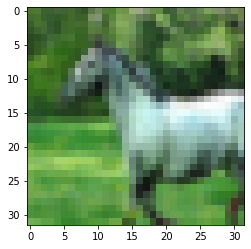

array([[[0.29411766, 0.47058824, 0.1764706 ],
        [0.3137255 , 0.46666667, 0.2       ],
        [0.23921569, 0.38431373, 0.1882353 ],
        ...,
        [0.41568628, 0.4745098 , 0.34117648],
        [0.47058824, 0.54509807, 0.32941177],
        [0.41960785, 0.5058824 , 0.30588236]],

       [[0.25490198, 0.42352942, 0.1764706 ],
        [0.26666668, 0.44705883, 0.16470589],
        [0.22352941, 0.3764706 , 0.1764706 ],
        ...,
        [0.32941177, 0.41568628, 0.2509804 ],
        [0.29803923, 0.39215687, 0.2509804 ],
        [0.41568628, 0.5137255 , 0.29803923]],

       [[0.23529412, 0.3647059 , 0.18431373],
        [0.2901961 , 0.44313726, 0.18431373],
        [0.27058825, 0.41960785, 0.20784314],
        ...,
        [0.24313726, 0.32156864, 0.18431373],
        [0.14509805, 0.20392157, 0.14117648],
        [0.3529412 , 0.39215687, 0.30980393]],

       ...,

       [[0.3019608 , 0.57254905, 0.24313726],
        [0.26666668, 0.54509807, 0.2       ],
        [0.3137255 , 0

In [7]:
img_name = train["id"].sample(n=1).to_string().split()[1]
print(img_name)
img = mpimg.imread(path + '/' + img_name + ".png")
imgplot = plt.imshow(img)
plt.show()
img

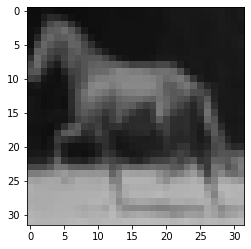

In [8]:
img = Image.open(path + '/' + train["id"].sample(n=1).to_string().split()[1] + ".png").convert("L")
arr = np.asarray(img)
imgplot = plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

Based on the minimum and maximum values of img array, we can assume that the pixel values are between 0 and 1

horse


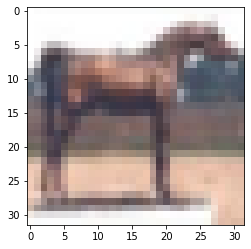

cat


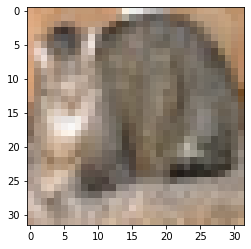

In [9]:
for _label in train["label"].unique():
    print(_label)
    img = mpimg.imread(path + '/' + train["id"][train.label == _label].sample(n=1).to_string().split()[1] + ".png")
    imgplot = plt.imshow(img)
    plt.show()

In [10]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

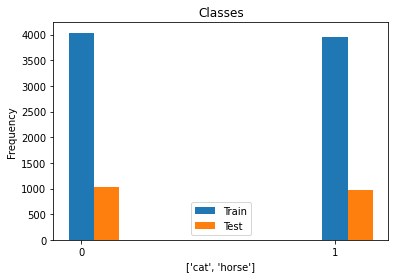

In [11]:
plt.ylabel("Frequency")
plt.title("Classes")

ticks = np.arange(2)
plt.xticks(np.arange(0, 10))
width = 0.1

plt.bar(ticks, train['label'].value_counts(), width=width, label="Train")
plt.bar(ticks+width, test['label'].value_counts(), width=width, label="Test")
plt.xlabel(["cat", "horse"])
plt.legend(loc="best")
plt.show()

<h3>Scaling</h3>
Scaling is used to set the pixels values in the range of 0 to 1. Neural networks process inputs using small weight values, and inputs with large integer values e.g. 255 can disrupt or slow down the learning process. 

Note that if we use imread, the pixels values stored in the arrays are already scaled between 0 and 1. This is because the imread method automatically scales the image.

# Dataloader

WHAT IS A DATALOADER???

In [12]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)

        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        onehot_vectors = pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
#         self.__data = self.__data.sample(frac=1).reset_index(drop=True)
#         self.__onehot_labels = self.__onehot_labels.sample(frac=1).reset_index(drop=True)
        perm = np.random.permutation((self.__data.shape[0]))
        self.__data = self.__data[perm]
        self.__onehot_labels = self.__onehot_labels[perm]

    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return

        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

# Activation Functions

[2] "It’s just a thing function that you use to get the output of node. It is also known as Transfer Function."<br>
An activation function defines how the weighted sum of the layer input is transformed into an output from a node/s in the network.<br>

In this project we implement 6 different activation functions:<br>

$$ 
Identical(x) = x \quad \text{and} \quad Identical'(x) = 1
$$


$$ 
Relu(x) = \begin{cases} x & x \geq 0\\
0 & x < 0 \end{cases}  \quad \text{and} \quad 
Relu'(x) = \begin{cases} 1 & x \geq 0\\
0 & x < 0 \end{cases} 
$$

$$ 
LeakyRelu(x) = \begin{cases} x & x > 0\\
\text{negative_slope}*x & x \leq 0 \end{cases} \quad \text{and} \quad 
LeakyRelu'(x) = \begin{cases} 1 & x > 0\\
\text{negative_slope} & x \leq 0 \end{cases} 
$$

$$ 
Sigmoid(x) = \frac{1}{1+e^{-x}} \quad \text{and} \quad 
Sigmoid'(x) = Sigmoid(x)(1-Sigmoid(x)) 
$$

$$ 
Softmax(x : matrix) = \frac{e^x_i}{\sum_{j=1}^{J} e^x_j}  \quad for \quad i = 1,...,Z \quad and \quad x = (x_1, x_2,...,x_Z)
$$

$$ 
Tanh(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} \quad \text{and} \quad 
Tanh'(x) = 1-Tanh(x)^2 
$$

In [46]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
        
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        relu_value = np.maximum(0, temp) # For negative values, set them to 0
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, 0)))
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_value = np.where(temp < 0, temp * self.negative_slope, temp)
        return leaky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, self.negative_slope)))
        # For negative values, we replace them with the negative slope
        return leaky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of sigmoid activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid_value = 1/(1 + np.exp(-temp))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        sigmoid_derivative = np.multiply(self.__val(temp), (1 - self.__val(temp)))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax: #//!!!
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
        

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                softmax_value: np.matrix of softmax activation function result
        '''
        temp = np.matrix(matrix, dtype=float)    
        softmax_value = np.apply_along_axis(lambda row: np.exp(row - np.max(row))/np.sum(np.exp(row - np.max(row))), 1, temp)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    '''
    tanh is also like logistic sigmoid but better. 
    The range of the tanh function is from (-1 to 1).
    tanh is also sigmoidal (s - shaped).
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix): # check
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_value = np.tanh(temp)
        tanh_value = np.matrix(tanh_value)
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        temp = np.matrix(matrix, dtype=float)
        tanh_derivative = 1 - np.power(self.__val(temp), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

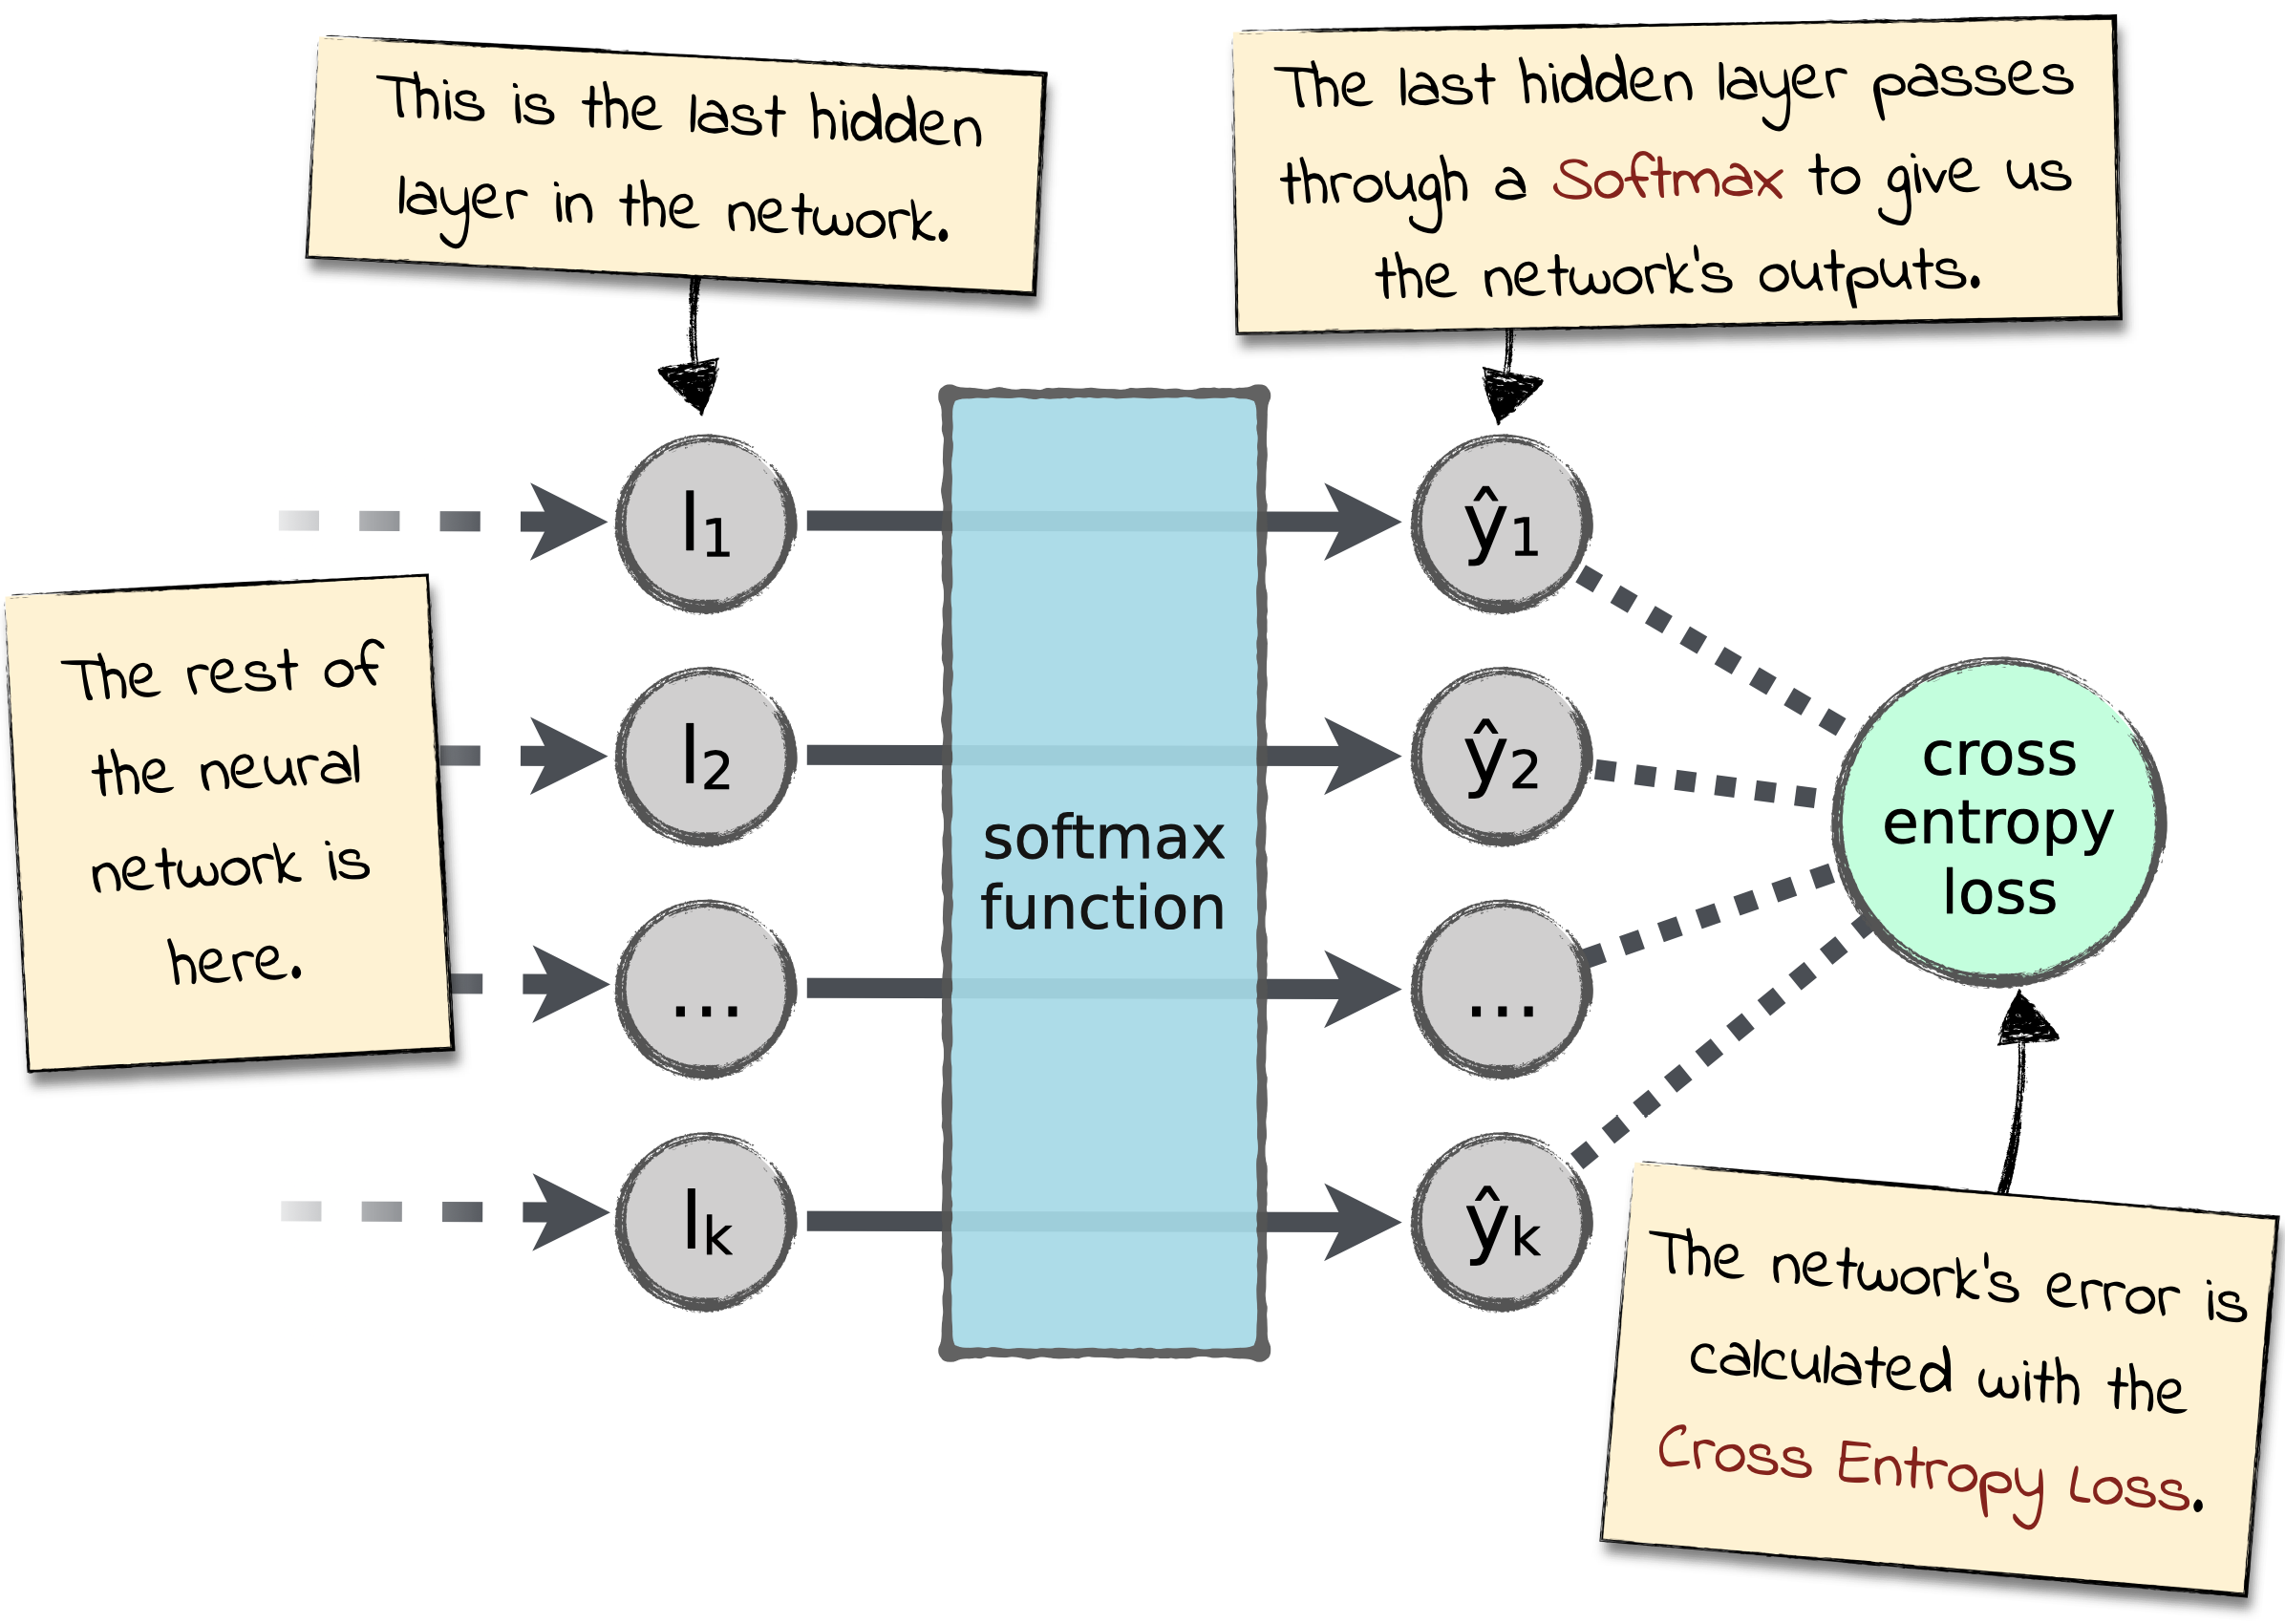

# Loss Function

In [14]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        
        true_val_mat = np.matrix(true_val, dtype=float)
        softmax_activation_output = np.log(Softmax()(true_val_mat))
        expected_val_mat = np.matrix(expected_val, dtype=float)
        
        cross_entropy_value =  -1 * np.sum(np.multiply(expected_val_mat, softmax_activation_output), axis=1)
        
        return cross_entropy_value
    
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
                                           
        true_val_mat = np.matrix(true_val, dtype=float)
        softmax_activation_output = Softmax()(true_val_mat)
        expected_val_mat = np.matrix(expected_val, dtype=float)
                                           
        cross_entropy_derivative = softmax_activation_output - expected_val_mat
                                           
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer


At the end of each layer, weights and biases must be updated as follows:

$$ \frac{\partial L}{\partial W} = x^T\frac{\partial L}{\partial y} $$
$$ \frac{\partial L}{\partial b} = 1\frac{\partial L}{\partial y} $$
$$ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y}W^T $$

In [15]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 
                                          'normal':self.__normal_weight, 
                                          'zero':self.__zero_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        
        self.__last_input = np.matrix(layer_input, dtype=float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)

        self.__last_activation_output = self.__activation(self.__last_activation_input)

        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        
        ones_matrix = np.matrix(np.ones((np.size(backprop_tensor,0), 1)))
        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        db = np.matmul(np.transpose(ones_matrix), dy)
        dw = np.matmul(np.transpose(self.__last_input), dy)
        
        backprop_tensor = np.matmul(dy, np.transpose(self.__weight))
        self.__weight -= lr * dw
        self.__bias -= lr * db
#         self.__bias -= lr * np.sum(backprop_tensor, 0)
        
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        weights = np.matrix(np.random.uniform(low, high, size=(dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.matrix(np.random.normal(mean, sqrt(var), size=(dim1, dim2)))
        return weights
    
    def __zero_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as 0.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
        Returns:
            np.matrix with size (dim1, dim2) initialized with 0 values.
        ''' 
        weights = np.matrix(np.zeros(shape=(dim1,dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [16]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"

        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
#         batch_losses = [x for x in batch_losses if ~np.isnan(x)]

        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        network_output = self.forward(x_batch)
        
#         output_labels = self.__get_labels(network_output)
        batch_accuracy = self.__compute_accuracy(y_batch, network_output)
        

        batch_average_loss = np.mean(self.__loss(network_output, y_batch))

        self.__update_weights(network_output, y_batch) # Update is needed for the training to take effect

        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        network_output = self.forward(x_batch)

        batch_accuracy = self.__compute_accuracy(network_output, y_batch)
        batch_average_loss = np.mean(self.__loss(network_output, y_batch))
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        labels = outputs.argmax(1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        output_labels = self.__get_labels(output)
        expected_output_labels = self.__get_labels(expected_output)
        accuracy = np.count_nonzero(output_labels==expected_output_labels) / np.size(output, 0) * 100
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        backpropagation_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backpropagation_tensor = layer.update_weights(backpropagation_tensor, self.__lr)
        return

# Data Classification

In this part, we'll be using the network implemented above and train a model for classifying the images of cats and horses.<br>
The hyper parameters values are initialized in the next code cell and at first, we'll be using 3 layers with 15, 10 and 2 neurons respectively. <br>
Our batch size will be 32 and learning rate is 0.001. Also, we'll be using 15 epochs.<br>
The input shape will be the shape of our training dataset which is a 1024(32x32) numpy array.

In [17]:
train.drop("id", axis=1, inplace=True)
test.drop("id", axis=1, inplace=True)

# Training Sample

In [18]:
INPUT_SHAPE = 1024
LEARNING_RATE = 0.001
EPOCHS = 25
BATCH_SIZE = 32

TRAINLOADER = [batch for batch in Dataloader(train.drop("label", axis=1), np.array(train["label"]).reshape(-1, 1), n_classes=2,
                                             batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(test.drop("label", axis=1), np.array(test["label"]).reshape(-1, 1), n_classes=2,
                                            batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
# network.add_layer(40, activation=Relu(), weight_initializer='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 53.7625	Average Loss: 2.4594237853253516
	Test: Average Accuracy: 58.68055555555556	Average Loss: 0.6727319133928876
Epoch 2:
	Train: Average Accuracy: 61.4125	Average Loss: 0.659532164305097
	Test: Average Accuracy: 61.95436507936508	Average Loss: 0.6496692292510977
Epoch 3:
	Train: Average Accuracy: 64.0875	Average Loss: 0.6379818451258875
	Test: Average Accuracy: 64.18650793650794	Average Loss: 0.6316845614752403
Epoch 4:
	Train: Average Accuracy: 66.125	Average Loss: 0.6196279163991134
	Test: Average Accuracy: 65.87301587301587	Average Loss: 0.6141298860343368
Epoch 5:
	Train: Average Accuracy: 67.6	Average Loss: 0.6013306180876443
	Test: Average Accuracy: 66.91468253968254	Average Loss: 0.6047019337200586
Epoch 6:
	Train: Average Accuracy: 69.4875	Average Loss: 0.5830570170415859
	Test: Average Accuracy: 68.20436507936508	Average Loss: 0.588696433459625
Epoch 7:
	Train: Average Accuracy: 71.0875	Average Loss: 0.5673175129489828
	Test: Average Acc

# Initial Weighting

What if we initialized the networks weights as 0?<br>
Would it make any difference?<br>
Let's see

In [19]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='zero')
# network.add_layer(40, activation=Relu(), weight_initializer='uniform')
network.add_layer(2, activation=Identical(), initial_weight='zero')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 50.6125	Average Loss: 0.6931741580838968
	Test: Average Accuracy: 51.83531746031746	Average Loss: 0.6930285624055689
Epoch 2:
	Train: Average Accuracy: 50.4875	Average Loss: 0.6931893474286107
	Test: Average Accuracy: 51.83531746031746	Average Loss: 0.6930265598221834
Epoch 3:
	Train: Average Accuracy: 50.4875	Average Loss: 0.6931896302123293
	Test: Average Accuracy: 51.83531746031746	Average Loss: 0.6930265242970517
Epoch 4:
	Train: Average Accuracy: 50.4875	Average Loss: 0.6931896352375514
	Test: Average Accuracy: 51.83531746031746	Average Loss: 0.6930265236662787
Epoch 5:
	Train: Average Accuracy: 50.4875	Average Loss: 0.6931896353267804
	Test: Average Accuracy: 51.83531746031746	Average Loss: 0.6930265236550789
Epoch 6:
	Train: Average Accuracy: 50.4875	Average Loss: 0.6931896353283648
	Test: Average Accuracy: 51.83531746031746	Average Loss: 0.6930265236548798
Epoch 7:
	Train: Average Accuracy: 50.4875	Average Loss: 0.693189635328393
	Test: Averag

When all the weights are set to zero, the derivatives will remain the same. As a result, neurons will learn the same features in each epoch. This problem is known as network failing to break symmetry.[3]

As you can see above, the accuracy almost never changes. This is because in each iteration of gradient descent, we will find the gradient for the previous layer by multiplying the existing weight with a gradient obtained by backpropagation from the next layer. If the initial weight is zero, multiplying it by any gradient will set the gradient to be zero. Due to zero gradient, the gradient descent process won’t change the weight which means each iteration has no effect on the weights we are trying to optimize.

Every neuron in the same layer has the same behavior, and will end up having the same weight. This is called the symmetric problem.<br>
The same problem happens if the weights are initialized with a constant value for example all the weights are one and the biases are zero.

# Learning Rate

Learning rate affects the learning process of a neural network and eventually the accuracy of the model.
In general three different cases may happen.

1. Correct learning rate  
2. Too big learning rate  
3. Too small learning rate  

In second case, our model may diverge and never find the optimal weight and biases.
In the too small learning rate, the time it takes for the model to find the optimal results increases.

# Best Rate

The best learning rate possible is

In [37]:
max_accuracies = {}

lrs = [0.0005 + 0.0005*i for i in range(5)]

for lr in lrs:
    network = FeedForwardNN(INPUT_SHAPE)

    network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
    network.add_layer(2, activation=Identical(), initial_weight='uniform')
    network.set_training_param(loss=CrossEntropy(), lr=lr)

    log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

    max_accuracies[lr] = {}
    max_accuracies[lr]['train_accuracy'] = log['train_accuracy'][-1]
    max_accuracies[lr]['test_accuracy'] = log['test_accuracy'][-1]

Epoch 1:
	Train: Average Accuracy: 50.9875	Average Loss: 3.9030047866612363
	Test: Average Accuracy: 48.263888888888886	Average Loss: 0.6976464659643613
Epoch 2:
	Train: Average Accuracy: 55.575	Average Loss: 0.6947285553210443
	Test: Average Accuracy: 55.15873015873016	Average Loss: 0.682549220041016
Epoch 3:
	Train: Average Accuracy: 59.8375	Average Loss: 0.6690113818453729
	Test: Average Accuracy: 59.82142857142857	Average Loss: 0.664344110227337
Epoch 4:
	Train: Average Accuracy: 62.2375	Average Loss: 0.6543368411581312
	Test: Average Accuracy: 61.95436507936508	Average Loss: 0.6519967521525633
Epoch 5:
	Train: Average Accuracy: 63.5125	Average Loss: 0.6437924978187678
	Test: Average Accuracy: 62.648809523809526	Average Loss: 0.6444050818114557
Epoch 6:
	Train: Average Accuracy: 64.5375	Average Loss: 0.6352779778099624
	Test: Average Accuracy: 64.28571428571429	Average Loss: 0.6359448122806343
Epoch 7:
	Train: Average Accuracy: 65.4	Average Loss: 0.6264931966413679
	Test: Average A

	Test: Average Accuracy: 69.19642857142857	Average Loss: 0.5683879930035359
Epoch 6:
	Train: Average Accuracy: 70.85	Average Loss: 0.560963715685587
	Test: Average Accuracy: 70.68452380952381	Average Loss: 0.5539074666623107
Epoch 7:
	Train: Average Accuracy: 71.825	Average Loss: 0.5469290312903474
	Test: Average Accuracy: 70.93253968253968	Average Loss: 0.5497321049359764
Epoch 8:
	Train: Average Accuracy: 72.4	Average Loss: 0.537190197949444
	Test: Average Accuracy: 71.37896825396825	Average Loss: 0.5422674280435061
Epoch 9:
	Train: Average Accuracy: 73.3	Average Loss: 0.5273561078902866
	Test: Average Accuracy: 71.72619047619048	Average Loss: 0.5389053367633703
Epoch 10:
	Train: Average Accuracy: 73.9125	Average Loss: 0.5210892836521623
	Test: Average Accuracy: 71.23015873015873	Average Loss: 0.541421945220134
Epoch 11:
	Train: Average Accuracy: 74.375	Average Loss: 0.5136301160387567
	Test: Average Accuracy: 72.02380952380952	Average Loss: 0.5351341138763558
Epoch 12:
	Train: Avera

	Train: Average Accuracy: 70.8	Average Loss: 0.5689209595135073
	Test: Average Accuracy: 71.18055555555556	Average Loss: 0.5844348114986649
Epoch 11:
	Train: Average Accuracy: 71.075	Average Loss: 0.5653622320477169
	Test: Average Accuracy: 71.13095238095238	Average Loss: 0.582407237149868
Epoch 12:
	Train: Average Accuracy: 71.5125	Average Loss: 0.562549656969373
	Test: Average Accuracy: 70.98214285714286	Average Loss: 0.581375599421802
Epoch 13:
	Train: Average Accuracy: 71.8125	Average Loss: 0.5591744042490224
	Test: Average Accuracy: 70.8829365079365	Average Loss: 0.5819393647655651
Epoch 14:
	Train: Average Accuracy: 71.875	Average Loss: 0.5580622043513759
	Test: Average Accuracy: 70.68452380952381	Average Loss: 0.5839439570858432
Epoch 15:
	Train: Average Accuracy: 72.0375	Average Loss: 0.5553889365453102
	Test: Average Accuracy: 70.73412698412699	Average Loss: 0.5820765534729984
Epoch 16:
	Train: Average Accuracy: 72.1375	Average Loss: 0.5529690438027868
	Test: Average Accuracy:

In [39]:
max_accuracies

{0.0005: {'train_accuracy': 74.375, 'test_accuracy': 71.92460317460318},
 0.001: {'train_accuracy': 78.1625, 'test_accuracy': 73.75992063492063},
 0.0015: {'train_accuracy': 79.325, 'test_accuracy': 75.1984126984127},
 0.002: {'train_accuracy': 79.5875, 'test_accuracy': 74.10714285714286},
 0.0025: {'train_accuracy': 73.1125, 'test_accuracy': 70.48611111111111}}

The best rate seems to be 0.002

In [40]:
LEARNING_RATE = 0.002

# Small Rate

At this rate the accuracy increases but the speed is extremly low thus the model needs more epochs to reach the same accuracy as the optimal learning rate.

In [41]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE*0.1)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 49.8375	Average Loss: 6.1666773118660405
	Test: Average Accuracy: 51.83531746031746	Average Loss: 3.0224303106540322
Epoch 2:
	Train: Average Accuracy: 50.225	Average Loss: 2.012997964153561
	Test: Average Accuracy: 48.16468253968254	Average Loss: 1.3524911006561873
Epoch 3:
	Train: Average Accuracy: 51.1	Average Loss: 0.8842465421527754
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.7491047969511622
Epoch 4:
	Train: Average Accuracy: 53.25	Average Loss: 0.7443380920746843
	Test: Average Accuracy: 50.69444444444444	Average Loss: 0.7012946358603512
Epoch 5:
	Train: Average Accuracy: 56.225	Average Loss: 0.7067494697826376
	Test: Average Accuracy: 53.67063492063492	Average Loss: 0.6910814153514094
Epoch 6:
	Train: Average Accuracy: 58.3625	Average Loss: 0.6893068738592484
	Test: Average Accuracy: 55.55555555555556	Average Loss: 0.6828719988085199
Epoch 7:
	Train: Average Accuracy: 59.6875	Average Loss: 0.6774188580986475
	Test: Average Accur

# Big Rate

The networks accuracy doesn't change.<br>
This learning rate causes a problem called gradient vanishing.

In [42]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE*10)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


C:\Users\WIN10\AppData\Local\Temp/ipykernel_19676/125374265.py:29: RuntimeWarning: divide by zero encountered in log
  softmax_activation_output = np.log(Softmax()(true_val_mat))
C:\Users\WIN10\AppData\Local\Temp/ipykernel_19676/125374265.py:32: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value =  -1 * np.sum(np.multiply(expected_val_mat, softmax_activation_output), axis=1)


	Train: Average Accuracy: 49.2125	Average Loss: nan
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6972392304110466
Epoch 2:
	Train: Average Accuracy: 49.4125	Average Loss: 0.6957675187213416
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6972392304110466
Epoch 3:
	Train: Average Accuracy: 49.4125	Average Loss: 0.6957675187213416
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6972392304110466
Epoch 4:
	Train: Average Accuracy: 49.4125	Average Loss: 0.6957675187213416
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6972392304110466
Epoch 5:
	Train: Average Accuracy: 49.4125	Average Loss: 0.6957675187213416
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6972392304110466
Epoch 6:
	Train: Average Accuracy: 49.4125	Average Loss: 0.6957675187213416
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6972392304110466
Epoch 7:
	Train: Average Accuracy: 49.4125	Average Loss: 0.6957675187213416
	Test: Average Accuracy: 48.16468253

# Activation Function

In this part, different activation functions are tested on the network.

# Sigmoid

In [43]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Sigmoid(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256342811955808
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970760974528682
Epoch 2:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256192036090324
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970760265917123
Epoch 3:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256189942619935
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970759558001451
Epoch 4:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256187846467465
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970758850710914
Epoch 5:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256185747493572
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970758143974584
Epoch 6:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256183645557988
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970757437721332
Epoch 7:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256181540519449
	Test: Avera

The sigmoid function normalizes the values(all of them are between 0 and 1). But when x(exp power) is a large positive or negative value, it'll decrease to 0.<br>
Also, it's more computationally expensive than other functions.<br>

# Hyperbolic Tangent

In [47]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Tanh(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256419246933945
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970660484291753
Epoch 2:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256520418543805
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970660461226748
Epoch 3:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256520321987419
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970660438136146
Epoch 4:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256520225376373
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970660415019782
Epoch 5:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256520128710083
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970660391877499
Epoch 6:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256520031987959
	Test: Average Accuracy: 48.16468253968254	Average Loss: 0.6970660368709133
Epoch 7:
	Train: Average Accuracy: 49.6125	Average Loss: 0.7256519935209408
	Test: Avera

This function normalizes the values in between -1 and 1 thus it's a zero centered function.<br>
This property is important in deep learning because it has been empirically shown that models operating on normalized data have faster convergence. Unfortunately, zero-centered activation functions saturate at their asymptotes, leading to a weak training signal. ReLU avoids this problem but it is not zero-centered.<br>

The problem with Sigmoid and Tanhs' performance is that they saturate.<br>
[4]A neuron is said to be saturated when extremely large weights cause the neuron to produce values (gradients) that are very close to the range boundary.<br>
If the gradient is constantly 0, no learning will take place in the neural network. Likewise, if the gradient is constantly 1, it most likely means that the neuron is over-fitting on training data and will likely perform poorly on test data.<br>
In these functions, over-fitting is happenning and the accuracy is relatively constant.

# Leaky Relu

In [45]:
network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 57.6125	Average Loss: 1.7338993861749057
	Test: Average Accuracy: 61.80555555555556	Average Loss: 0.6531808114560895
Epoch 2:
	Train: Average Accuracy: 63.6	Average Loss: 0.6364414154577457
	Test: Average Accuracy: 62.15277777777778	Average Loss: 0.6486232954113722
Epoch 3:
	Train: Average Accuracy: 66.5125	Average Loss: 0.6058431835909728
	Test: Average Accuracy: 66.81547619047619	Average Loss: 0.6012454033309854
Epoch 4:
	Train: Average Accuracy: 68.9	Average Loss: 0.5806663988579458
	Test: Average Accuracy: 68.99801587301587	Average Loss: 0.5666413470084731
Epoch 5:
	Train: Average Accuracy: 70.65	Average Loss: 0.5635658533907205
	Test: Average Accuracy: 70.83333333333333	Average Loss: 0.5589825196362481
Epoch 6:
	Train: Average Accuracy: 71.5375	Average Loss: 0.5501858860869882
	Test: Average Accuracy: 72.32142857142857	Average Loss: 0.5422660761146569
Epoch 7:
	Train: Average Accuracy: 72.3875	Average Loss: 0.5387239614565362
	Test: Average Accur

Leaky Relu is faster both in convergence and its computation. This function doesn't saturate and the gradients don't get killed. But the problem is that it's not consistent.<br>
Leaky Relu has a slope for negative values while Relu deletes these values.

# Batch Size

The batch size defines the number of samples that will be propagated through the network.<br>
Batch size is one of the most important hyperparameters to tune in modern deep learning systems.<br>
This is because using the entire dataset guarantees convergence to the global optima of the objective function. However, this is at the cost of slower, empirical convergence to that optima.

Now, let's try different batch sizes.

In [51]:
BATCH_SIZE = 16

TRAINLOADER = [batch for batch in Dataloader(train.drop("label", axis=1), np.array(train["label"]).reshape(-1, 1), n_classes=2,
                                             batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(test.drop("label", axis=1), np.array(test["label"]).reshape(-1, 1), n_classes=2,
                                            batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=LeakyRelu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 57.0375	Average Loss: 1.5494979575014896
	Test: Average Accuracy: 62.25	Average Loss: 0.6502087525988509
Epoch 2:
	Train: Average Accuracy: 63.4625	Average Loss: 0.6346826701843279
	Test: Average Accuracy: 65.95	Average Loss: 0.613606472557584
Epoch 3:
	Train: Average Accuracy: 66.875	Average Loss: 0.6012817856735144
	Test: Average Accuracy: 69.15	Average Loss: 0.5783972653877366
Epoch 4:
	Train: Average Accuracy: 69.2375	Average Loss: 0.5773418799994077
	Test: Average Accuracy: 69.35	Average Loss: 0.5739910634193105
Epoch 5:
	Train: Average Accuracy: 71.0375	Average Loss: 0.5598971348430088
	Test: Average Accuracy: 71.6	Average Loss: 0.5522395335409723
Epoch 6:
	Train: Average Accuracy: 72.0875	Average Loss: 0.5470221869466506
	Test: Average Accuracy: 71.75	Average Loss: 0.542552913287689
Epoch 7:
	Train: Average Accuracy: 73.1875	Average Loss: 0.5367352388179158
	Test: Average Accuracy: 72.4	Average Loss: 0.5368416580396621
Epoch 8:
	Train: Average 

In [50]:
BATCH_SIZE = 256

TRAINLOADER = [batch for batch in Dataloader(train.drop("label", axis=1), np.array(train["label"]).reshape(-1, 1), n_classes=2,
                                             batch_size=BATCH_SIZE, shuffle=False)]
TESTLOADER = [batch for batch in Dataloader(test.drop("label", axis=1), np.array(test["label"]).reshape(-1, 1), n_classes=2,
                                            batch_size=BATCH_SIZE, shuffle=False)]

network = FeedForwardNN(INPUT_SHAPE)

network.add_layer(45, input_shape=INPUT_SHAPE, activation=Relu(), initial_weight='uniform')
network.add_layer(2, activation=Identical(), initial_weight='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:


C:\Users\WIN10\AppData\Local\Temp/ipykernel_19676/125374265.py:29: RuntimeWarning: divide by zero encountered in log
  softmax_activation_output = np.log(Softmax()(true_val_mat))
C:\Users\WIN10\AppData\Local\Temp/ipykernel_19676/125374265.py:32: RuntimeWarning: invalid value encountered in multiply
  cross_entropy_value =  -1 * np.sum(np.multiply(expected_val_mat, softmax_activation_output), axis=1)


	Train: Average Accuracy: 49.59716796875	Average Loss: nan
	Test: Average Accuracy: 48.20462740384615	Average Loss: 0.6932348056645574
Epoch 2:
	Train: Average Accuracy: 50.89111328125	Average Loss: 0.6931803903884797
	Test: Average Accuracy: 48.20462740384615	Average Loss: 0.6932359505038583
Epoch 3:
	Train: Average Accuracy: 50.89111328125	Average Loss: 0.6931802942001912
	Test: Average Accuracy: 48.20462740384615	Average Loss: 0.6932359506166756
Epoch 4:
	Train: Average Accuracy: 50.89111328125	Average Loss: 0.6931802941907192
	Test: Average Accuracy: 48.20462740384615	Average Loss: 0.693235950616687
Epoch 5:
	Train: Average Accuracy: 50.89111328125	Average Loss: 0.6931802941907184
	Test: Average Accuracy: 48.20462740384615	Average Loss: 0.693235950616687
Epoch 6:
	Train: Average Accuracy: 50.89111328125	Average Loss: 0.6931802941907181
	Test: Average Accuracy: 48.20462740384615	Average Loss: 0.693235950616687
Epoch 7:
	Train: Average Accuracy: 50.89111328125	Average Loss: 0.6931802

The larger batch size has poor performance. This is because with the larger batch size our model has poor generalization and over-fits and doesn't converge.

<h3>Advantages of very small batch size</h3>

It takes less memory.<br>
Also, it is more generalized and has better accuracy overall.
Using smaller batch sizes have been empirically shown to have faster convergence to “good” solutions.<br>
This is intuitively explained by the fact that smaller batch sizes allow the model to “start learning before having to see all the data.” 

<h3>Disadvantages of very small batch size</h3>
The model is not guaranteed to converge to the global optima. It will bounce around the global optima, staying outside some ϵ-ball of the optima where ϵ depends on the ratio of the batch size to the dataset size. Therefore, under no computational constraints, it is often advised that one starts at a small batch size, reaping the benefits of faster training dynamics, and steadily grows the batch size through training, also reaping the benefits of guaranteed convergence.



# References
[1] https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/<br>
[2] https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6<br>
[3] https://towardsdatascience.com/neural-network-breaking-the-symmetry-e04f963395dd<br>
[4] https://datascience.stackexchange.com/questions/27665/what-is-saturating-gradient-problem<br>
[5] https://paperswithcode.com/method/leaky-relu<br>
[6] https://medium.com/mini-distill/effect-of-batch-size-on-training-dynamics-21c14f7a716e